In [2]:
# Importer les bibliothèques
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Préparer le jeu de données 

In [4]:
# Charger les images originales
data_directory = r"C:\Users\saida\anaconda_dossier\Deep_Learning\mes_images_runes\mes_images"
image_files = os.listdir(data_directory)
images = []
labels = [0,1,2,3,4,5]

for filename in image_files:
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(data_directory, filename)).convert('L')  # Convertir en niveaux de gris
        images.append(img)
        
# Redimensionner les images et appliquer la rotation pour augmenter les données
augmented_images = []
augmented_labels = []

for iteration in range(260) :
    for i, img in enumerate(images):
        for angle in range(-20, 20):
            rotated_img = img.rotate(angle, resample=Image.BILINEAR, fillcolor=255)  # Appliquer la rotation
            resized_img = rotated_img.resize((28, 28), Image.LANCZOS)  # Redimensionner l'image
            augmented_images.append(np.array(resized_img))  # Convertir en tableau numpy
            augmented_labels.append(labels[i])

In [5]:
# Partitionner les données
X_train, X_test, y_train, y_test = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Convertir en tableaux numpy
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Normaliser les valeurs des pixels (0-1)
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
# Ajouter une dimention par canal d'image
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Afficher les dimensions des ensembles de données
print("Dimensions des ensembles d'entraînement, de validation et de test :")
print("Entraînement :", X_train.shape, y_train.shape)
print("Validation   :", X_val.shape, y_val.shape)
print("Test         :", X_test.shape, y_test.shape)

Dimensions des ensembles d'entraînement, de validation et de test :
Entraînement : (49920, 28, 28, 1) (49920,)
Validation   : (6240, 28, 28, 1) (6240,)
Test         : (6240, 28, 28, 1) (6240,)


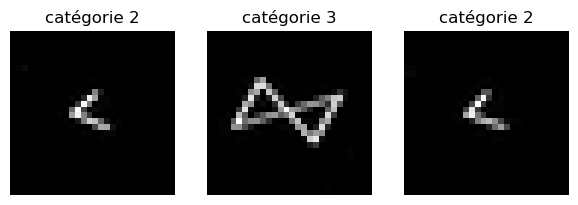

In [7]:
# Visualiser le jeu de donnees
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

X_new = X_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest", )
    plt.axis('off')
    plt.title(f"catégorie {y_test[index]}")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
# Architecture du CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=4, padding="SAME", activation="relu", input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=len(np.unique(y_test)), activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 6)                 37638     
                                                                 
Total params: 38,182
Trainable params: 38,182
Non-trainable params: 0
____________________________________________________

In [10]:
# Entraîner le modèle
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1560/1560 [==============================] - 29s 18ms/step - loss: 0.1036 - accuracy: 0.9805 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/10
1560/1560 [==============================] - 50s 32ms/step - loss: 6.4511e-04 - accuracy: 1.0000 - val_loss: 9.1662e-04 - val_accuracy: 1.0000
Epoch 3/10
1560/1560 [==============================] - 60s 39ms/step - loss: 1.6046e-04 - accuracy: 1.0000 - val_loss: 3.2935e-04 - val_accuracy: 1.0000
Epoch 4/10
1560/1560 [==============================] - 39s 25ms/step - loss: 5.5646e-05 - accuracy: 1.0000 - val_loss: 1.4517e-04 - val_accuracy: 1.0000
Epoch 5/10
1560/1560 [==============================] - 39s 25ms/step - loss: 2.1250e-05 - accuracy: 1.0000 - val_loss: 6.2413e-05 - val_accuracy: 1.0000
Epoch 6/10
1560/1560 [==============================] - 39s 25ms/step - loss: 8.7668e-06 - accuracy: 1.0000 - val_loss: 3.1423e-05 - val_accuracy: 1.0000
Epoch 7/10
1560/1560 [==============================] - 33s 21ms/step - loss: 3.6139

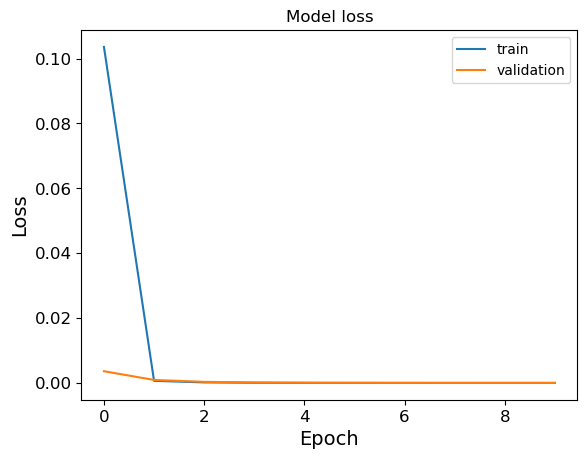

In [11]:
# Visualiser l'évolution de la fonction de coût sur les données d'entraînement et de validation
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Prédictions 
y_proba = model.predict(X_test)
y_pred = []
for i in range(len(y_proba)):
    y_pred.append(np.argmax(y_proba[i]))
y_pred = np.array(y_pred)

195/195 [==============================] - 3s 14ms/step


In [13]:
r2 = r2_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"Le score sur les données test est de : {r2*100}%")
print(f"L'accuracy sur les données test est de : {r2*100}%")

Le score sur les données test est de : 100.0%
L'accuracy sur les données test est de : 100.0%


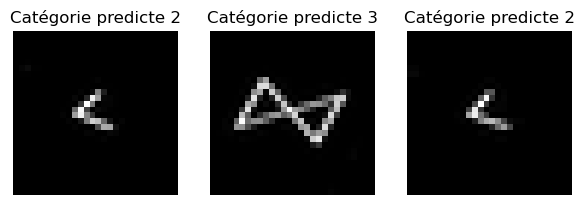

In [14]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(f"Catégorie predicte {y_pred[index]}")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()